<a href="https://colab.research.google.com/github/JoaoDaross/NBADataWithKMeansClustering/blob/main/NBADataWithKMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aprendendo a usar o Kmeans clustering

Vamos usar essa ferramenta para separar os jogadores da NBA em grupos. 

**Dataset:**  [nba_2013.csv](https://raw.githubusercontent.com/JoaoDaross/NBADataWithKMeansClustering/main/nba_2013.csv)

In [70]:
# importando as bibliotecas.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
# coletando os dados
fonte = 'https://raw.githubusercontent.com/JoaoDaross/NBADataWithKMeansClustering/main/nba_2013.csv'

# leitura dos dados
data = pd.read_csv(fonte)

# Moastrando as 5 primeiras linhas
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [76]:
#visualizando o número de linhas e colunas
nlinhas, nColunas = data.shape
print(f'Este Dataset possui {nlinhas} linhas e {nColunas} colunas')

Este Dataset possui 481 linhas e 31 colunas


In [77]:
# Informações gerais
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [78]:
# Identificando as principais métricas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,481.0,26.509356,4.198265,19.0,23.000000,26.000000,29.000000,39.0
g,481.0,53.253638,25.322711,1.0,32.000000,61.000000,76.000000,83.0
gs,481.0,25.571726,29.658465,0.0,0.000000,10.000000,54.000000,82.0
mp,481.0,1237.386694,897.258840,1.0,388.000000,1141.000000,2016.000000,3122.0
fg,481.0,192.881497,171.832793,0.0,47.000000,146.000000,307.000000,849.0
fga,481.0,424.463617,368.850833,0.0,110.000000,332.000000,672.000000,1688.0
fg.,479.0,0.436436,0.098672,0.0,0.400500,0.438000,0.479500,1.0
x3p,481.0,39.613306,50.855639,0.0,0.000000,16.000000,68.000000,261.0
x3pa,481.0,110.130977,132.751732,0.0,3.000000,48.000000,193.000000,615.0
x3p.,414.0,0.285111,0.157633,0.0,0.234355,0.330976,0.375000,1.0


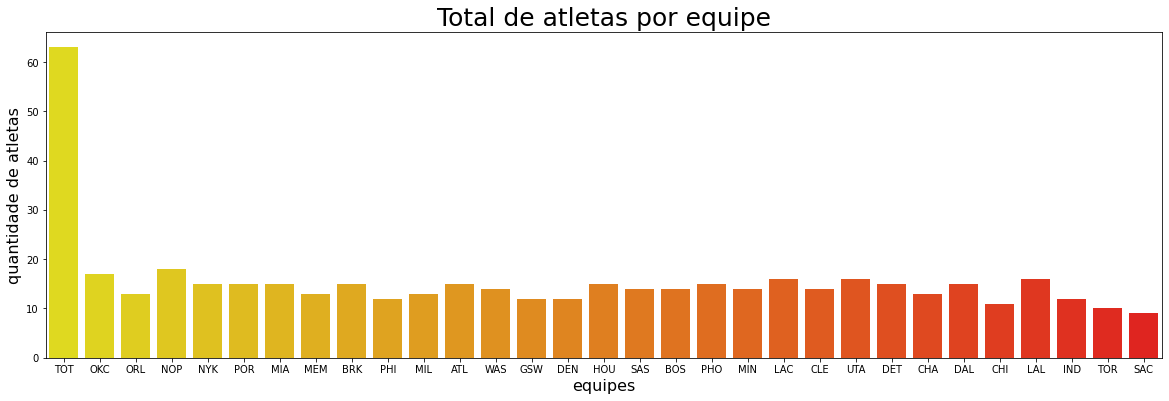

In [82]:
#visualizando quantos atletas temos em cada equipe
plt.figure(figsize=(20,6))
ax = sns.countplot(x=data['bref_team_id'],
                   palette='autumn_r')

ax.set_title('Total de atletas por equipe', fontsize=25)
ax.set_xlabel('equipes', fontsize=16)
ax.set_ylabel('quantidade de atletas', fontsize=16);

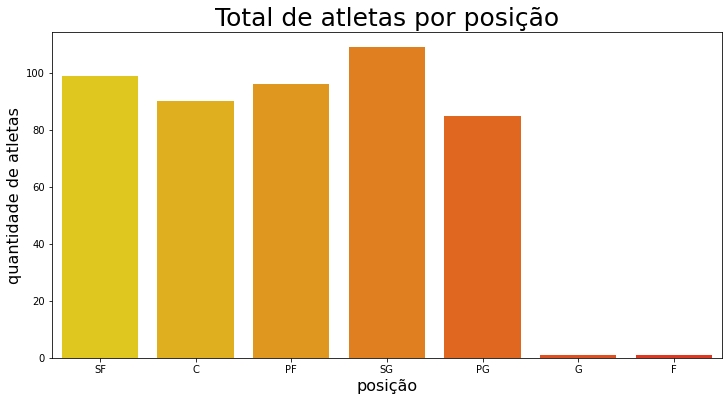

In [83]:
#visualizando quantos atletas temos em cada posição
plt.figure(figsize=(12,6))
ax = sns.countplot(x=data['pos'],
                   palette='autumn_r')

ax.set_title('Total de atletas por posição', fontsize=25)
ax.set_xlabel('posição', fontsize=16)
ax.set_ylabel('quantidade de atletas', fontsize=16);

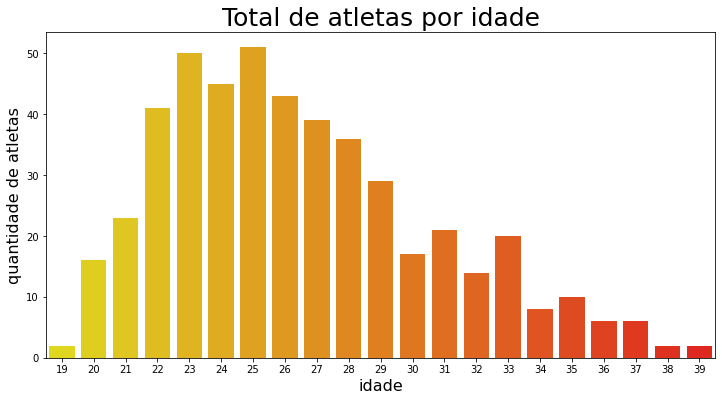

In [84]:
#visualizando quantos atletas temos em cada idade
plt.figure(figsize=(12,6))
ax = sns.countplot(x=data['age'],
                   palette='autumn_r')

ax.set_title('Total de atletas por idade', fontsize=25)
ax.set_xlabel('idade', fontsize=16)
ax.set_ylabel('quantidade de atletas', fontsize=16);

In [ ]:
# Identificando a média de tentativas de arremessos e arremessos acertados
data.loc[:,['fg','fga']].mean()

fg     192.881497
fga    424.463617
dtype: float64

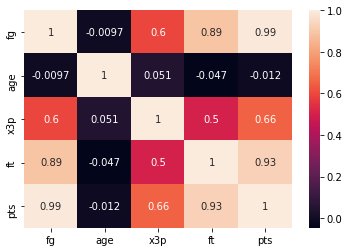

In [ ]:
# Correlação entre principais variáveis
sns.heatmap(data[['fg','age','x3p','ft','pts']].corr(),annot= True)

Field goals - 99% - Tentativas e pontos

Free Throws made - 93%  - Lance livres e acertos

3 point shots - 66% - Acertos em 3 pontos

A idade (Age) não é um fator que influência variáveis de pontos

In [ ]:
# Vamos agrupar os jogadores com o metodo de Kmeans
from sklearn.cluster import KMeans

#Criar o modelo de Kmeans com 5 clusters
kmean_model = KMeans(n_clusters = 5,random_state = 41) 

#Apenas colunas numéricas
num_columns = data._get_numeric_data().dropna(axis = 1) 

# Treinar o moedelo
kmean_model.fit(num_columns)

# Criando as labels
labels = kmean_model.labels_

print(labels)

[0 0 0 4 0 2 4 0 3 3 3 2 3 3 1 0 3 4 2 0 1 2 0 0 1 2 0 2 2 2 3 3 1 3 2 1 3
 4 3 2 0 4 0 1 0 3 2 2 0 3 3 3 3 2 2 3 0 3 1 4 1 3 1 2 3 2 2 2 2 0 2 1 1 3
 1 2 2 0 0 0 1 3 2 1 1 4 3 1 3 1 2 2 0 2 2 3 2 1 3 4 2 4 2 2 1 1 0 3 2 2 4
 3 2 2 2 4 0 3 2 2 2 0 1 4 1 0 0 0 4 4 3 1 1 4 2 2 4 2 0 0 1 1 0 2 1 2 3 2
 3 3 1 2 2 0 1 0 0 0 1 1 4 0 4 1 3 2 2 2 2 2 1 4 0 2 3 3 1 4 0 4 2 0 2 0 3
 4 3 2 2 0 2 2 2 1 0 1 0 4 1 0 1 1 1 3 1 3 2 1 0 2 2 0 4 0 3 4 3 3 4 2 1 1
 2 2 2 4 2 2 2 4 1 2 4 0 1 0 0 4 2 1 2 2 0 2 1 1 0 0 1 2 3 3 0 4 1 3 2 2 0
 3 2 2 1 2 1 4 2 1 2 0 0 2 4 1 3 0 1 4 4 2 3 0 1 3 0 0 1 2 4 2 2 3 0 0 2 2
 1 1 1 2 1 0 0 0 3 0 3 4 2 2 4 3 2 3 1 3 0 2 3 2 2 2 2 2 2 2 0 2 1 0 4 2 4
 2 0 0 2 1 3 2 2 0 3 2 1 4 3 1 1 0 1 2 3 1 2 2 2 0 2 2 0 3 2 2 2 4 0 2 0 3
 2 3 0 0 0 2 1 1 2 0 3 0 0 3 3 3 0 1 2 2 3 0 0 1 2 2 2 2 2 0 1 0 4 0 2 0 3
 2 4 0 2 3 1 1 0 2 4 2 3 0 2 2 2 4 2 2 3 3 4 1 3 2 0 1 0 2 4 2 0 0 1 3 2 3
 0 2 1 2 1 1 4 4 3 2 0 2 2 1 4 3 2 2 1 3 0 3 3 3 2 0 0 3 2 0 2 0 1 1 4 3 0]


Só temos números entre 0 e 4 porque criamos 5 novos grupos

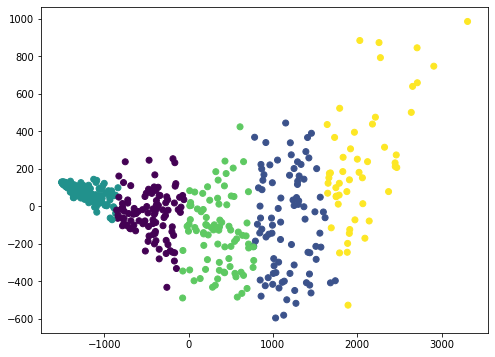

In [ ]:
# Visualizando a distribuição dos clusters
plt.figure(figsize=(8,6))
from sklearn.decomposition import PCA
pca = PCA(2)
plot_pca = pca.fit_transform(num_columns)
plt.scatter(x= plot_pca[:,0], y = plot_pca[:,1],c= labels)
plt.show() 

In [ ]:
# Buscando os dados do jogador Lebron James
LeBron = num_columns.loc[data['player']=='LeBron James',:] 
LeBron

,age,g,gs,mp,fg,fga,x3p,x3pa,x2p,x2pa,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
225,29,77,77,2902,767,1353,116,306,651,1047,439,585,81,452,533,488,121,26,270,126,2089,2013


In [ ]:
# Buscando os dados do jogador Kevin Durant
KD = num_columns.loc[data['player']=='Kevin Durant',:]
KD

,age,g,gs,mp,fg,fga,x3p,x3pa,x2p,x2pa,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
133,25,81,81,3122,849,1688,192,491,657,1197,703,805,58,540,598,445,103,59,285,174,2593,2013


In [ ]:
# O modelo kmeans pede uma lista de valores
LeBron_list = LeBron.values.tolist() 
Kevin_list = KD.values.tolist()

In [ ]:
# Verificar se ambos jogadores estão no mesmo cluster
print(kmean_model.predict(LeBron_list)) 
print(kmean_model.predict(Kevin_list))

[4]
[4]


In [ ]:
# Novo dataframe
cluster_map = pd.DataFrame()

# Adicionando os valores dos jogadores ao novo dataframe
cluster_map['player_name'] = data.player.values

# Criando uma coluna com os valores dos clusters
cluster_map['cluster_no.'] = labels

# Apenas os jogadores do cluster 4
cluster_map[cluster_map['cluster_no.'] == 4]

,player_name,cluster_no.
3,Arron Afflalo,4
6,LaMarcus Aldridge,4
17,Carmelo Anthony,4
37,Nicolas Batum,4
41,Bradley Beal,4
59,Chris Bosh,4
85,Michael Carter-Williams,4
99,Mike Conley,4
101,DeMarcus Cousins,4
110,Stephen Curry,4


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
plot_columns = pca.fit_transform(num_columns)

In [ ]:
data.drop(['pos','season','season_end','bref_team_id'],axis=1,inplace =True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   player  481 non-null    object 
 1   age     481 non-null    int64  
 2   g       481 non-null    int64  
 3   gs      481 non-null    int64  
 4   mp      481 non-null    int64  
 5   fg      481 non-null    int64  
 6   fga     481 non-null    int64  
 7   fg.     479 non-null    float64
 8   x3p     481 non-null    int64  
 9   x3pa    481 non-null    int64  
 10  x3p.    414 non-null    float64
 11  x2p     481 non-null    int64  
 12  x2pa    481 non-null    int64  
 13  x2p.    478 non-null    float64
 14  efg.    479 non-null    float64
 15  ft      481 non-null    int64  
 16  fta     481 non-null    int64  
 17  ft.     461 non-null    float64
 18  orb     481 non-null    int64  
 19  drb     481 non-null    int64  
 20  trb     481 non-null    int64  
 21  ast     481 non-null    int64  
 22  st

In [ ]:
new = data[['player','fta','fga','x3pa','pts']]
new

,player,fta,fga,x3pa,pts
0,Quincy Acy,53,141,15,171
1,Steven Adams,136,185,0,265
2,Jeff Adrien,119,275,0,362
3,Arron Afflalo,336,1011,300,1330
4,Alexis Ajinca,67,249,1,328
...,...,...,...,...,...
476,Tony Wroten,326,808,188,939
477,Nick Young,285,889,350,1144
478,Thaddeus Young,229,1283,292,1417
479,Cody Zeller,200,404,1,490


In [ ]:
new.describe().T

,count,mean,std,min,25%,50%,75%,max
fta,481.0,120.642412,131.240639,0.0,22.0,73.0,179.0,805.0
fga,481.0,424.463617,368.850833,0.0,110.0,332.0,672.0,1688.0
x3pa,481.0,110.130977,132.751732,0.0,3.0,48.0,193.0,615.0
pts,481.0,516.582121,470.422228,0.0,115.0,401.0,821.0,2593.0


In [ ]:
dummies = pd.get_dummies(new.player)
dummies.head(3)

,A.J. Price,Aaron Brooks,Aaron Gray,Adonis Thomas,Al Harrington,Al Horford,Al Jefferson,Al-Farouq Aminu,Alan Anderson,Alec Burks,Alex Len,Alexey Shved,Alexis Ajinca,Allen Crabbe,Alonzo Gee,Amar'e Stoudemire,Amir Johnson,Anderson Varejao,Andray Blatche,Andre Drummond,Andre Iguodala,Andre Miller,Andre Roberson,Andrea Bargnani,Andrei Kirilenko,Andrew Bogut,Andrew Bynum,Andrew Nicholson,Andris Biedrins,Antawn Jamison,Anthony Bennett,Anthony Davis,Anthony Morrow,Anthony Randolph,Anthony Tolliver,Archie Goodwin,Arinze Onuaku,Arnett Moultrie,Aron Baynes,Arron Afflalo,...,Tim Hardaway,Timofey Mozgov,Tobias Harris,Toney Douglas,Tony Allen,Tony Mitchell,Tony Parker,Tony Snell,Tony Wroten,Tornike Shengelia,Toure' Murry,Travis Outlaw,Trevor Ariza,Trevor Booker,Trey Burke,Tristan Thompson,Troy Daniels,Ty Lawson,Tyler Hansbrough,Tyler Zeller,Tyreke Evans,Tyshawn Taylor,Tyson Chandler,Udonis Haslem,Vander Blue,Viacheslav Kravtsov,Victor Claver,Victor Oladipo,Vince Carter,Vitor Faverani,Wayne Ellington,Wesley Johnson,Wesley Matthews,Will Barton,Will Bynum,Willie Green,Wilson Chandler,Xavier Henry,Zach Randolph,Zaza Pachulia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data1 = pd.concat([dummies,new],axis = 1)

In [ ]:
data1.drop(['player'],axis = 1,inplace =True)

In [ ]:
X = data1.drop(['pts'],axis = 1)
y = data1['pts']

In [ ]:
print(X.shape)
print(y.shape)

(481, 484)
(481,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 100)

In [ ]:
y_test = y_test[:,np.newaxis]
y_train = y_train[:,np.newaxis]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [ ]:
y_train.shape

(384, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Lr.score(X_test,y_test)

0.9905932319277113

In [ ]:
def predict_points(player,fta,fga,x3pa):    
    loc_index = np.where(X.columns==player)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = fta
    x[1] = fga
    x[2] = x3pa
    if loc_index >= 0:
        x[loc_index] = 1

    return round(Lr.predict([x])[0][0])

In [ ]:
#Testando o modelo
predict_points('LeBron James',1011,136,300)

4288.0

In [ ]:

predict_points('Kevin Durant',1011,136,300)

4242.0

In [ ]:

predict_points('Jeff Adrien',1011,136,300)

4048.0